# Task 1: Exploratory Data Analysis and Data Preprocessing

In [1]:
import sys
import os
import pandas as pd
from glob import glob

In [2]:
from pathlib import Path
from importlib import reload
# add the project root to the path
project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

## Data Loading

In [3]:
# import the module to load the data into dataframes
from src.data_loader import DataLoader
import src.data_loader
reload(src.data_loader)

<module 'src.data_loader' from '/home/chalasimon/Documents/10academy/week 6/challenge/CrediTrust-RAG-Chatbot/src/data_loader.py'>

In [4]:
# Load the dataset
data_loader = DataLoader('../data/raw/complaints.csv')
df = data_loader.load_data()

/home/chalasimon/Documents/10academy/week 6/challenge/CrediTrust-RAG-Chatbot/src/data_loader.py:20: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(self.file_path)


In [5]:
# print first 10 rows of the dataset
print(df.head(10))

  Date received                                            Product  \
0    2025-06-20  Credit reporting or other personal consumer re...   
1    2025-06-20                                    Debt collection   
2    2025-06-20  Credit reporting or other personal consumer re...   
3    2025-06-20  Credit reporting or other personal consumer re...   
4    2025-06-20  Credit reporting or other personal consumer re...   
5    2025-06-20  Credit reporting or other personal consumer re...   
6    2025-06-20  Credit reporting or other personal consumer re...   
7    2025-06-20  Credit reporting or other personal consumer re...   
8    2025-06-20  Credit reporting or other personal consumer re...   
9    2025-06-20  Credit reporting or other personal consumer re...   

               Sub-product                                 Issue  \
0         Credit reporting  Incorrect information on your report   
1  Telecommunications debt     Attempts to collect debt not owed   
2         Credit reportin

In [6]:
# shape of the dataframe
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (9609797, 18)


## Exploratory Data Analysis (EDA)

#### Basic Statistics:

In [7]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
count,9609797,9609797,9374502,9609791,8770275,2980756,4839590,9609797,9555281,9579569,628768,7960236,9609797,9609797,9609777,9609797,768299,9.609797e+06
unique,4952,21,86,178,272,2108758,11,7674,63,34965,3,4,7,4901,8,2,2,NaN
top,2025-01-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting a...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",FL,XXXXX,Servicemember,Consent not provided,Web,2025-02-25,Closed with explanation,Yes,No,NaN
freq,34093,4834855,6955847,3613761,2324057,21622,4537468,2321626,1273171,172807,391563,4639279,9017914,32525,5487712,9535859,619921,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.092744e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.774842e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.038016e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.448508e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.129591e+07


#### Complaint Distribution by Product:

In [8]:
# complaint distribution by product
product_counts = df['Product'].value_counts()
print("Complaint Distribution by Product:")
print(product_counts)

Complaint Distribution by Product:
Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                      

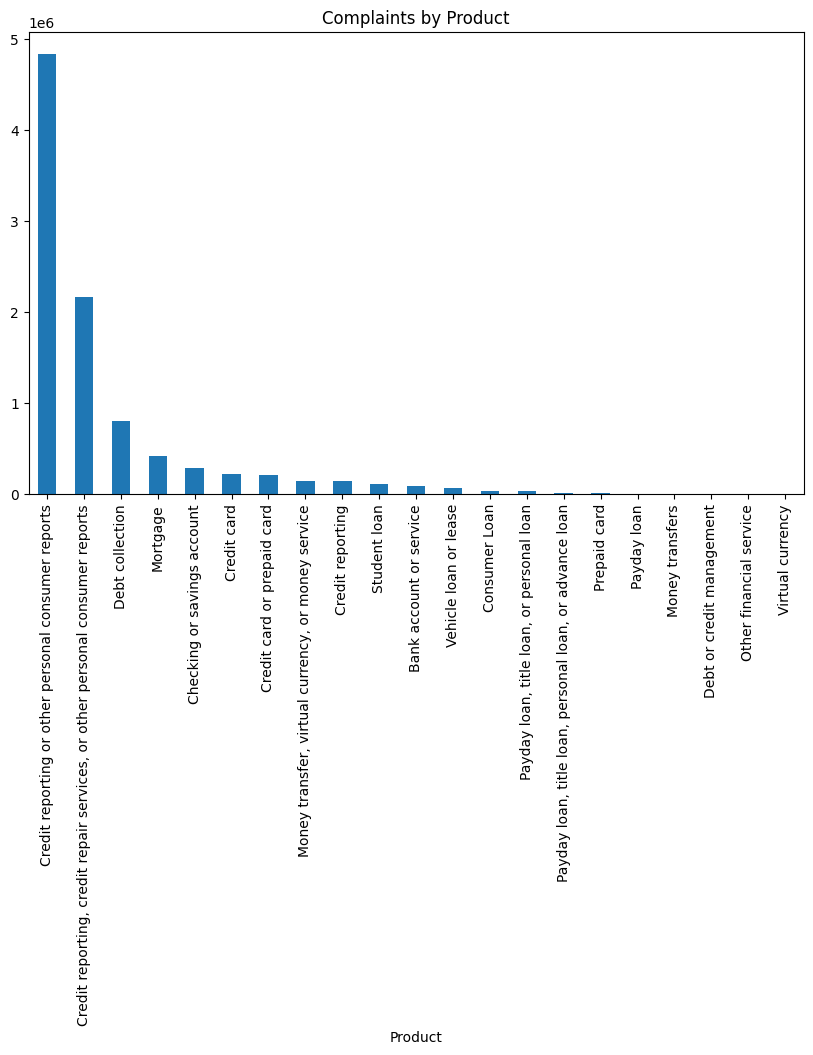

In [9]:
# Plotting the complaint distribution by product
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.title('Complaints by Product')
plt.savefig('../docs/screenshots/product_distribution.png')

#### Narrative analysis:

In [10]:
# Narrative Analysis
from tqdm import tqdm
tqdm.pandas()

# Faster alternative to str.split().str.len()
df['narrative_length'] = df['Consumer complaint narrative'].progress_apply(
    lambda x: len(x.split()) if isinstance(x, str) else 0
)
print(df['narrative_length'].describe())

100%|██████████| 9609797/9609797 [00:42<00:00, 224407.61it/s]


count    9.609797e+06
mean     5.446667e+01
std      1.497672e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+01
max      6.469000e+03
Name: narrative_length, dtype: float64


In [11]:
# Identify very short or very long narratives (example thresholds)
short_narratives = df[df['narrative_length'] < 5]
long_narratives = df[df['narrative_length'] > 1000]
print("Number of short narratives (less than 5 words):", len(short_narratives))
print("Number of long narratives (more than 1000 words):", len(long_narratives))

Number of short narratives (less than 5 words): 6632216
Number of long narratives (more than 1000 words): 32428


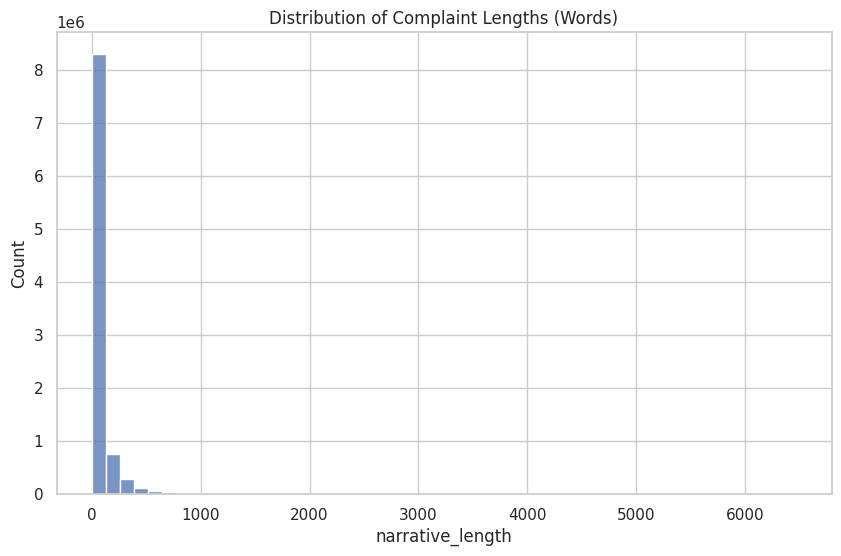

In [12]:
# plotting Distribution of Complaint Lengths
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(df['narrative_length'].dropna(), bins=50)
plt.title('Distribution of Complaint Lengths (Words)')
plt.savefig('../docs/screenshots/narrative_length_dist.png')
plt.show()

In [13]:
print("\n=== Missing Data ===")
print(f"Missing narratives: {df['Consumer complaint narrative'].isna().sum()}")


=== Missing Data ===
Missing narratives: 6629041


In [14]:
from src.preprocessing import cleaner, filter

In [15]:
df_filtered = filter.filter_data(df)

In [16]:
# Clean text
df_filtered['clean_text'] = df_filtered['Consumer complaint narrative'].apply(cleaner.clean_text)

In [17]:
output_path="../data/processed/filtered_complaints.csv"

In [18]:
# Save processed data
df.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

Processed data saved to ../data/processed/filtered_complaints.csv


### cleaned and filtered data details

In [19]:
# cleaned and filtered data details
print("\n=== Cleaned and Filtered Data Details ===")
print(f"Number of complaints before filtering: {df.shape[0]}")
print(f"Number of complaints after filtering: {df_filtered.shape[0]}")
print(f"Number of complaints after filtering: {len(df_filtered):,}")
print(f"Number of unique mapped products: {df_filtered['MappedProduct'].nunique()}\n")



=== Cleaned and Filtered Data Details ===
Number of complaints before filtering: 9609797
Number of complaints after filtering: 478818
Number of complaints after filtering: 478,818
Number of unique mapped products: 5



In [20]:

# === Product distribution ===
print("=== Complaint Counts per Product ===")
product_counts = df_filtered['MappedProduct'].value_counts()
print(product_counts)
print("\n")

=== Complaint Counts per Product ===
MappedProduct
Saving account        155204
Buy now, pay later    118128
Money transfers        98685
Credit card            80667
Personal loan          26134
Name: count, dtype: int64




In [21]:
# === Narrative analysis ===
df_filtered['word_count'] = df_filtered['clean_text'].fillna("").apply(lambda x: len(str(x).split()))

print("=== Narrative Statistics ===")
print(df_filtered['word_count'].describe())
print("\n")

# Short / Long / Missing narratives
short_count = (df_filtered['word_count'] < 5).sum()
long_count = (df_filtered['word_count'] > 1000).sum()
missing_count = df_filtered['clean_text'].isna().sum()

print(f"Short narratives (<5 words): {short_count:,}")
print(f"Long narratives (>1000 words): {long_count:,}")
print(f"Missing narratives: {missing_count:,}")

=== Narrative Statistics ===
count    478818.000000
mean        202.530893
std         220.960133
min           1.000000
25%          82.000000
50%         136.000000
75%         252.000000
max        6469.000000
Name: word_count, dtype: float64


Short narratives (<5 words): 275
Long narratives (>1000 words): 5,110
Missing narratives: 0
